## Project Proposal (Group 5)

### Group Member:
Chenyi Zhao (72337454)
<br>Anyna Wang  (53713814)
<br>Jerry(Qun) Gai (72356637)
<br>Ritisha Jhamb (61345534)

### Title
##### Finding correlations between smoking status and sleep efficiency by statistical inference

### Introduction
The ratio of time spent in bed to total bedtime is sleeping efficiency, abbreviated as SE (Reed & Sacco, 2016). Poor sleeping efficiency not only affects our mood but also negatively affects our physical health. Related studies have investigated how sleep disturbances are very common among smokers (Jaehne et al., 2012).

This dataset comes from a data modeling and analysis platform called Kaggle. The dataset contains 15 columns of sleeping pattern information for 452 observations. We will use sleeping efficiency as the variable of interest and smoking status as the category for comparison (smoking and no smoking).
 
We want to further investigate the relationship between smoking status and sleeping efficiency by statistical inference. Therefore, our research question is: Does smoking status affect sleeping efficiency? We plan to investigate whether there is a real difference between the mean for sleeping efficiency of the two smoking groups by using the bootstrap method to construct a confidence interval compared with asymptotic method. Using hypothesis testing to evaluate the rationality and effectiveness of the estimates. We will also do a little bit more analysis on the difference of standard deviations for two smoking groups.


### Preliminary Results

In [1]:
library(tidyverse)
library(infer)
library(nycflights13)
library(readr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
# Read the dataset into R and set seed to make sure our codes are reproducible
set.seed(1)
se <- read_csv("https://raw.githubusercontent.com/GerGerGai/STAT-201-Group-5/main/Sleep_Efficiency.csv")

Rows: 452 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (2): Gender, Smoking status
dbl  (11): ID, Age, Sleep duration, Sleep efficiency, REM sleep percentage, ...
dttm  (2): Bedtime, Wakeup time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
# Take a look at the dataset
# Note that the dataset is already in tidy format with each column representing one variable,
# Each row representing one observation and each cell containing one single value
# We make a small improvement by adding "_" to column names to make them easier to edit
# We also filter out rows containing NAs in Sleep_efficiency or Smoking_status columns
colnames(se) <- c('ID','Age','Gender','Bedtime','Wakeup_time','Sleep_duration','Sleep_efficiency','REM_sleep_percentage','Deep_sleep_percentage','Light_sleep_percentage',
                 'Awakenings','Caffeine_consumption','Alcohol_consumption','Smoking_status','Exercise_frequency')
se <- se|>filter(!is.na(Sleep_efficiency) & !is.na(Smoking_status)) 
head(se)

ID,Age,Gender,Bedtime,Wakeup_time,Sleep_duration,Sleep_efficiency,REM_sleep_percentage,Deep_sleep_percentage,Light_sleep_percentage,Awakenings,Caffeine_consumption,Alcohol_consumption,Smoking_status,Exercise_frequency
<dbl>,<dbl>,<chr>,<dttm>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0,0,0,Yes,3
2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3,0,3,Yes,3
3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1,0,0,No,3
4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3,50,5,Yes,1
5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3,0,3,No,3
6,36,Female,2021-07-01 21:00:00,2021-07-01 04:30:00,7.5,0.90,23,60,17,0,NA,0,No,1


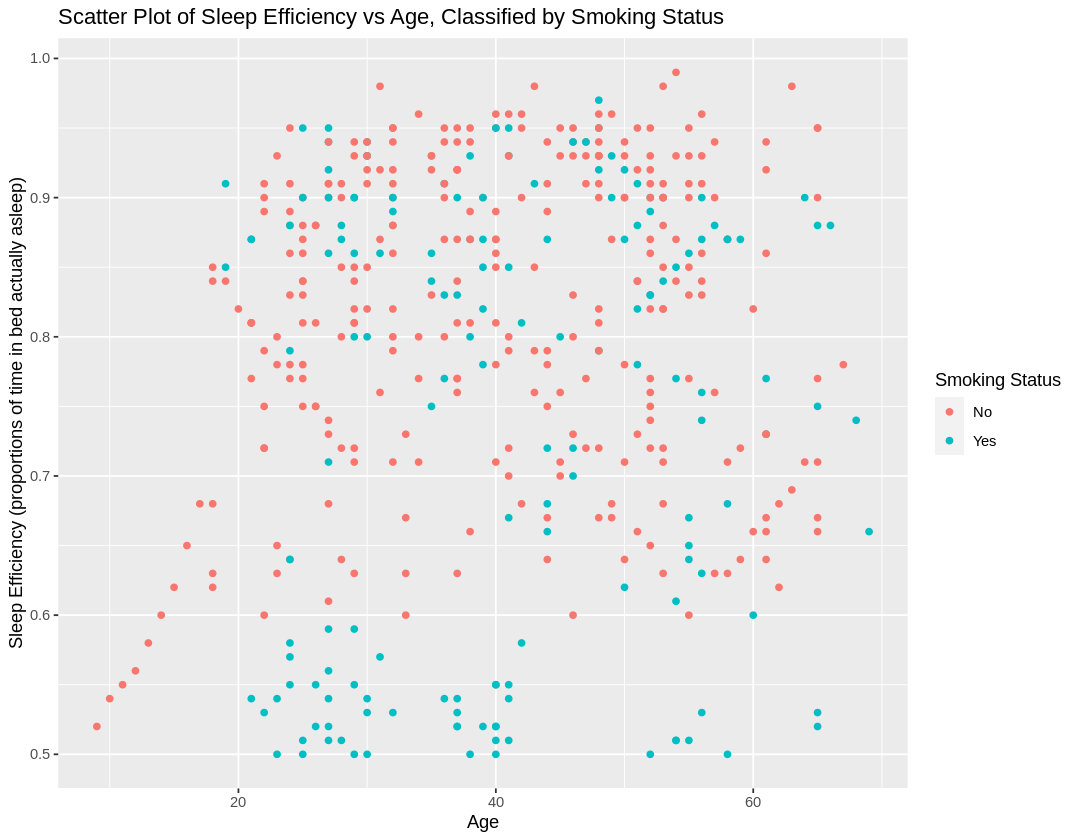

In [4]:
# Plot Sleep Efficiency vs Age, and colored the points by Smoking Status
# The purpose of this plot is to see if we can get any indications that smoking status can impact sleep efficiency
# Note that most of the points at the bottom of the plot (Sleep Efficiency < 0.6) are colored by Smoking Status == 'Yes'.
# Hence, there is a possibility that smoking can reduce sleep efficiency.
# We will do more thorough analysis in our final report to see if this plot reflects the truth or is due to sample variations.
library(repr)
options(repr.plot.width=9, repr.plot.height=7)

smoking_se_plot <- se |> 
ggplot()+
geom_point(aes(x = Age, y = Sleep_efficiency, color = Smoking_status))+
labs(x = "Age", y = "Sleep Efficiency (proportions of time in bed actually asleep)", 
title = "Scatter Plot of Sleep Efficiency vs Age, Classified by Smoking Status",
                color = "Smoking Status")



smoking_se_plot

In [5]:
# Here, we compute the means of sleep efficiency across the two smoking groups.
# We also compute the standard deviations of sleep efficiency across the two smoking groups.
# Note that there is a 6% difference in sd of sleep efficiency between the two smoking groups.
# This might indicate that smoking can reduce the stability of sleep quality.
# Hence, in addition to the comprehensive analysis on difference of means of sleep efficiency between the two groups, we will
# also do a bit analysis on difference of sd of sleep efficiency between the two groups to see if this is also the truth.
summarize_table <- se |>
                    group_by(Smoking_status)|>
                    summarize(mean_efficiency = mean(Sleep_efficiency),
                              sd = sd(Sleep_efficiency))
summarize_table

Smoking_status,mean_efficiency,sd
<chr>,<dbl>,<dbl>
No,0.8170805,0.1093840
Yes,0.7344156,0.1617106


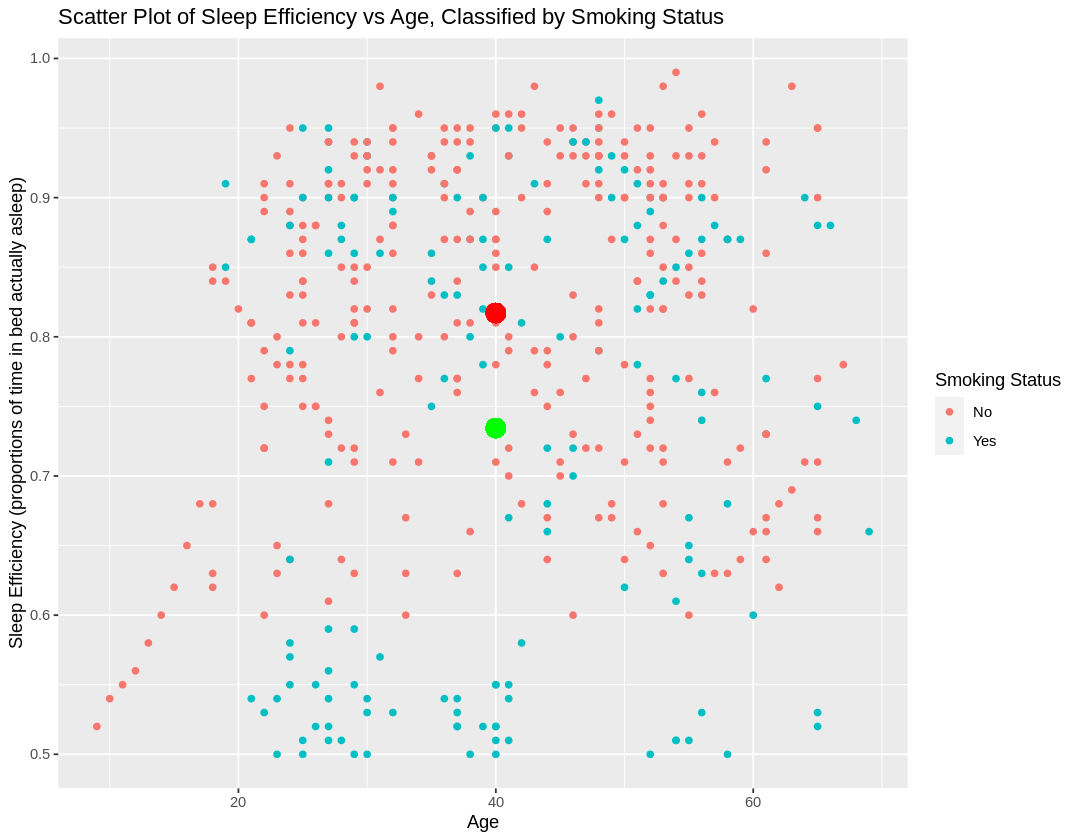

In [6]:
# We include the means of sleep efficiency of the two smoking groups into our plot to facilitate our presentation.
# Red for Smoking Status == "No" and Green for Smoking Status == "Yes".
smoking_se_plot + geom_point(aes(x=40,y = summarize_table$mean_efficiency[1]),color = "red", size = 5)+
                  geom_point(aes(x=40,y = summarize_table$mean_efficiency[2]),color = "green", size = 5)

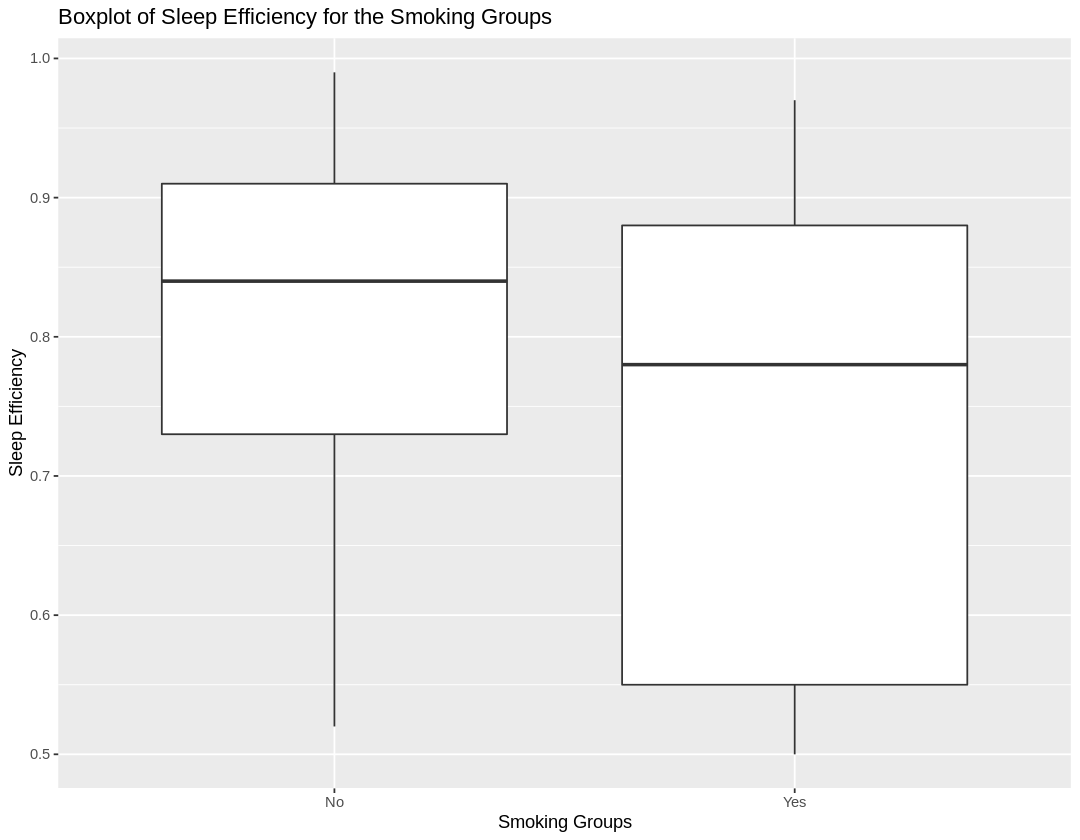

In [7]:
# Plot a boxplot to facilitate comparisons.
# Note that there is a clear difference of means and sd between the two smoking groups from our sample.
smoking_se_boxplot <- se |> ggplot(aes(x = Smoking_status, y = Sleep_efficiency))+
                                geom_boxplot()+
                                labs(y = "Sleep Efficiency", x = "Smoking Groups",
                                     title = "Boxplot of Sleep Efficiency for the Smoking Groups")
smoking_se_boxplot

In [8]:
# A little bit more analysis to check the conditions for applying CLT
# First select the two useful columns
se_useful <- se |> select(Sleep_efficiency, Smoking_status)
head(se_useful)

Sleep_efficiency,Smoking_status
<dbl>,<chr>
0.88,Yes
0.66,Yes
0.89,No
0.51,Yes
0.76,No
0.90,No


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



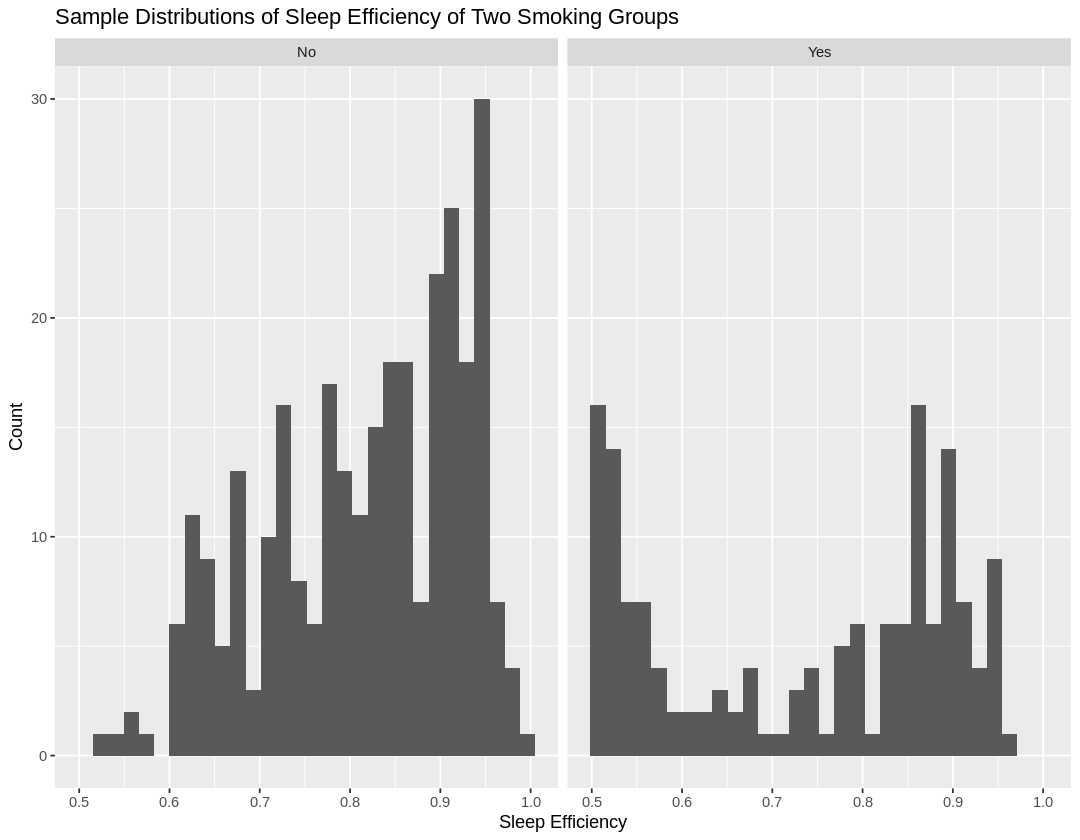

In [9]:
# Draw the sample distribution of sleep efficiency of the two smoking groups
# The sample distributions serve as estimates to the population distributions
# Note that both groups have non-normal sample distributions, which indicates that we need a large sample size in order to apply CLT
sample_dis <- se_useful |>
                ggplot()+
                geom_histogram(aes(x = Sleep_efficiency))+
                labs(x = "Sleep Efficiency", y = "Count",
                     title = "Sample Distributions of Sleep Efficiency of Two Smoking Groups")+
                facet_wrap(~Smoking_status)
sample_dis

In [10]:
# Theory-based Hypothesis testing of difference in means, at 5% significance level.

# Calculate the observed t-statistic

obs_two_sample_t <- se_useful %>% 
  specify(formula = Sleep_efficiency ~ Smoking_status) %>% 
  calculate(stat = "t", order = c("No", "Yes"))

obs_two_sample_t

stat
<dbl>
5.704998


Warning message:
“Check to make sure the conditions have been met for the theoretical method. {infer} currently does not check these for you.”


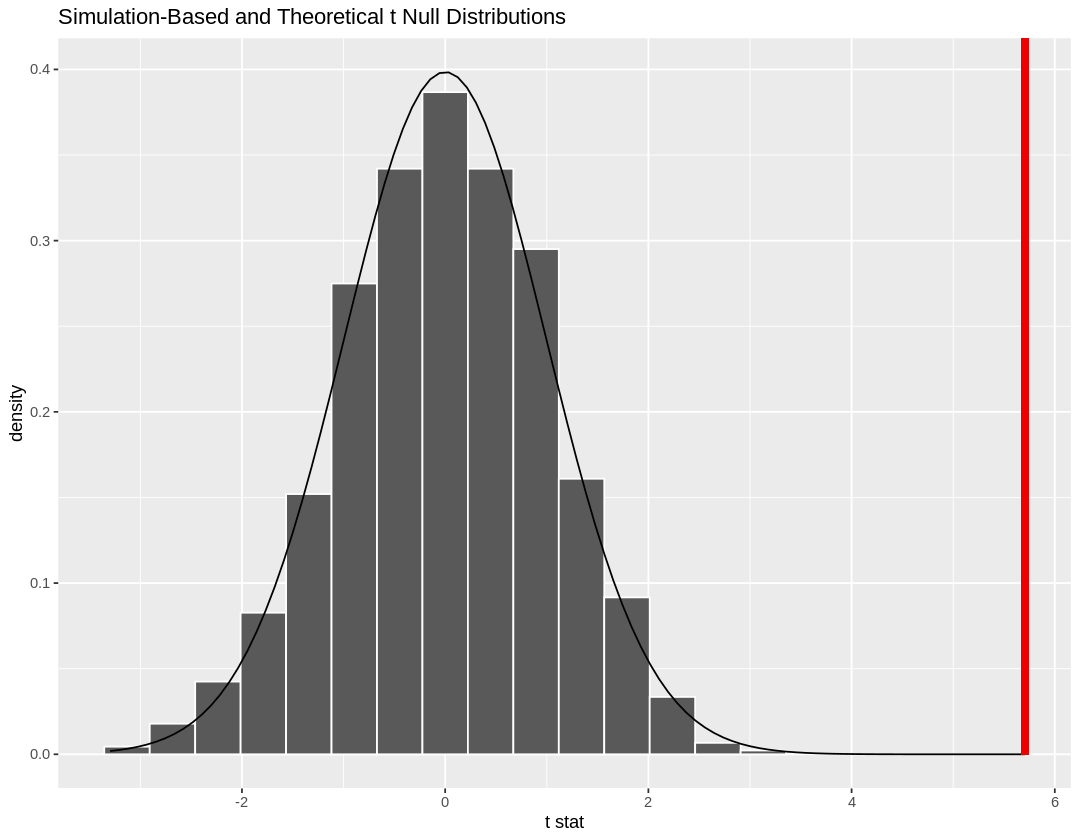

In [16]:
# Construct null distribution of t

null_distribution_t <- se_useful %>% 
  specify(formula = Sleep_efficiency ~ Smoking_status) %>% 
  hypothesize(null = "independence") %>% 
  generate(reps = 1000, type = "permute") %>% 
  calculate(stat = "t", order = c("No", "Yes"))

# Visualize the null distribution of t along with the t-distribution curve with degree of freedom = 298 + 154 - 2 = 450
# Include our observed t-statistic into the plot and shade the p-value

visualize(null_distribution_t, method = "both")+
    shade_p_value(obs_stat = obs_two_sample_t, direction = "right")

In [17]:
null_distribution_t |> 
    get_p_value(obs_stat = obs_two_sample_t, direction = "right")

Warning message:
“Please be cautious in reporting a p-value of 0. This result is an approximation based on the number of `reps` chosen in the `generate()` step. See `?get_p_value()` for more information.”


p_value
<dbl>
0


In [12]:
# 95% Confidence Interval for difference of means based on Central Limit Theorem.

# We're going to use the theory-based CLT to construct a 95% CI for difference of means between the two groups.

# First, let's check the conditions for applying the CLT
# 1. We have already seen that the sample distributions of the two groups are not normal. Hence, we need a large enough sample size
# for both groups in order to apply CLT.
# We can see from the following codes that sample sizes for both groups are large enough. 
# Furthermore, since they are much larger than 50, we are allowed to use a normal distribution to approximate the sampling distribution
# of the difference of means.

sample_sizes <- se_useful |>
                group_by(Smoking_status)|>
                summarize(n = n())
sample_sizes

# 2. Is the estimator being used a sum of random componenets? Yes. The estimator here is the difference of means and we need to sum
# up random components to get the means.

# 3. Was the sample taken in an independent fashion? Yes, based on the data description from Kaggle.

Smoking_status,n
<chr>,<int>
No,298
Yes,154


In [11]:
# Pull out useful vectors.

non_smokers <- se_useful|>
                filter(Smoking_status == "No")|>
                pull(Sleep_efficiency)

smokers <- se_useful |>
            filter(Smoking_status == "Yes")|>
            pull(Sleep_efficiency)

# Calculate statistics
diff_means <- obs_diff_means
var1 <- var(non_smokers)
var2 <- var(smokers)
n1 <- length(non_smokers)
n2 <- length(smokers)
sd <- sqrt((var1/n1) + (var2/n2))

# Construct the 95% CI based on CLT

se_diff_ci <- 
        tibble(
                lower_ci = pull(diff_means - qnorm(0.975)*sd),
                upper_ci = pull(diff_means + qnorm(0.975)*sd)
        )
se_diff_ci



ERROR: Error in eval(expr, envir, enclos): object 'obs_diff_means' not found


In [11]:
# Simulation-based hypothesis testing for difference of medians, at 5% significance level
# We use simulation-based hypothesis testing here. ----Add Reason?: textbook 9.6.1: bottom paragraphs

# First, calculate the observed difference
obs_diff_medians <- se_useful |>
                    specify(Sleep_efficiency ~ Smoking_status)|>
                    calculate(stat = "diff in medians", order = c("No","Yes"))
obs_diff_medians

stat
<dbl>
0.06


In [12]:
# Construct the null distribution assuming the null hypothesis is true

null_diff_medians <- se_useful |>
                    specify(Sleep_efficiency ~ Smoking_status)|>
                    hypothesize(null = "independence")|>
                    generate(reps = 1000, type = "permute")|>
                    calculate(stat = "diff in medians", order = c("No", "Yes"))

head(null_diff_medians)

replicate,stat
<int>,<dbl>
1,0.000
2,-0.025
3,-0.040
4,0.035
5,-0.015
6,0.000


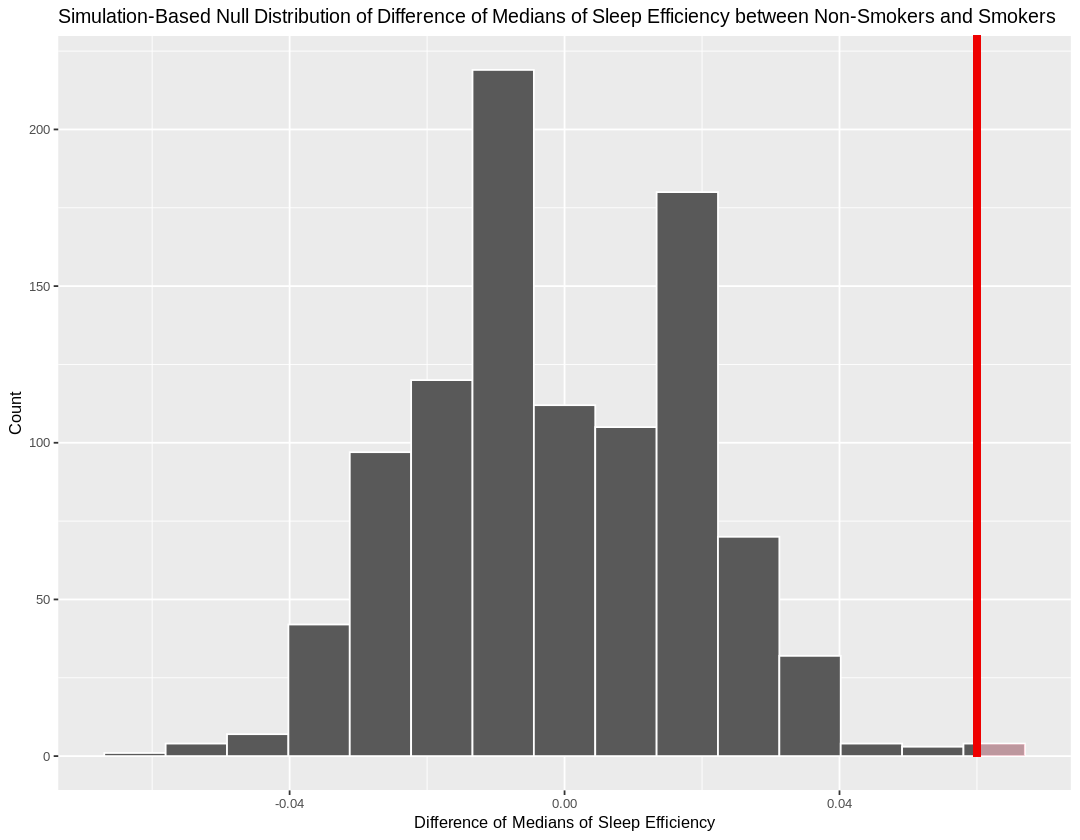

In [13]:
# visualize the null distribution together with the observed difference

null_visual <- null_diff_medians |> 
                visualize()+
                shade_p_value(obs_stat = obs_diff_medians, direction = "right")+
                labs(x = "Difference of Medians of Sleep Efficiency", y = "Count", 
                     title = "Simulation-Based Null Distribution of Difference of Medians of Sleep Efficiency between Non-Smokers and Smokers")+
                theme(text = element_text(size = 9.8))

null_visual

In [14]:
# Get the p-value

null_diff_medians %>% 
  get_p_value(obs_stat = obs_diff_medians, direction = "right")

# We usually do not report p-value of 0 
# Instead, we will say our p-value < 0.001.
# This means that, given the null hypothesis is true, the probability of getting a difference of means between the two smoking groups
# that is equal to or higher than our observed difference = 0.08266 is less than 0.001, which is less than 0.05.
# Hence, we will reject the null hypothesis at 5% significance level.

p_value
<dbl>
0.004


### Method: Plan
#### Trustworthiness of the Report:
1. Data Source: The dataset used is obtained from a reliable data modeling and analysis platform, Kaggle, which enhances the credibility of the findings.
2. Data Tidiness: The dataset is presented in a tidy format, making it easier to perform analysis and draw accurate conclusions.
3. Initial Analysis: The scatter plot and summary statistics provide valuable insights into the potential relationship between sleep efficiency, age, and smoking status, laying the groundwork for further investigation.
 
#### Addressing Gaps in Analysis:
However, initial plots and estimates, though suggestive of a relationship between smoking status and sleep efficiency, do not provide conclusive evidence of such association. The distinction observed in the scatter plot could be a by-product of sampling variation, requiring further validation. To address this gap, the report will perform the following statistical analyses:
1. Hypothesis Testing: Conduct a hypothesis test to determine if there are significant differences both in the mean and standard deviation of  sleep efficiency between the two smoking groups. This test will help establish whether smoking status indeed affects sleep efficiency. We are testing 2 hypotheses with the following values:   
  -  $\mu_1$ = mean sleep efficiency of non-smokers,  $\mu_2$ = mean sleep efficiency of smokers
   - $m_1$ = median sleep efficiency of non-smokers,  $m_2$ = median sleep efficiency of smokers
 
 These are the hypotheses: 
   - $H_0: \mu_1 - \mu_2 = 0$ vs $H_1: \mu_1 - \mu_2 > 0$ 
 - $H_0: m_1 - m_2 = 0$ vs $H_1: m_1 - m_2 > 0$ 
    
2. Confidence Interval (Bootstrap Method): Utilize the bootstrap method to construct confidence intervals for the difference of means and standard deviations of sleep efficiency for the two smoking groups. By generating confidence intervals, we can quantify the uncertainty surrounding the estimates and provide more robust results to stakeholders.
3. The report will compare the bootstrap method with the asymptotics method to assess the reliability and accuracy of the results from both approaches.

#### Expected outcomes and significance
1. What do you expect to find?

    We anticipate finding a significant difference in mean sleep efficiency between smokers and non-smokers.

2. What impact could such findings have?

    Such findings could have considerable implications for public health initiatives. Demonstrating a significant correlation between smoking and diminished sleep efficiency could support the development of targeted interventions aiming to improve sleep health among smokers.

3. What future questions could this lead to?
- Do these effects differ with the duration or intensity of smoking?
- How do different cessation methods impact sleep efficiency in former smokers?
- Are there interventions that can mitigate the impact of smoking on sleep efficiency?

### Reference
Equilibriumm. (2023, February 21). *Sleep efficiency dataset.* Kaggle. https://www.kaggle.com/datasets/equilibriumm/sleep-efficiency

Jaehne, A., Unbehaun, T., Feige, B., Lutz, U. C., Batra, A., & Riemann, D. (2012). How smoking affects sleep: a polysomnographical analysis. *Sleep medicine, 13*(10), 1286-1292.

Reed, D. L., & Sacco, W. P. (2016). Measuring sleep efficiency: what should the denominator be?. *Journal of clinical sleep medicine, 12*(2), 263-266.